# Root Finding Methods

## Functions and Import Statements

In [4]:
from math import e, log10
import matplotlib.pyplot as plt

def df(x):
    return -e**-x -1
def f(x):
    return e**-x - x 

## Bisection Method

Root: 0.5671432903036475


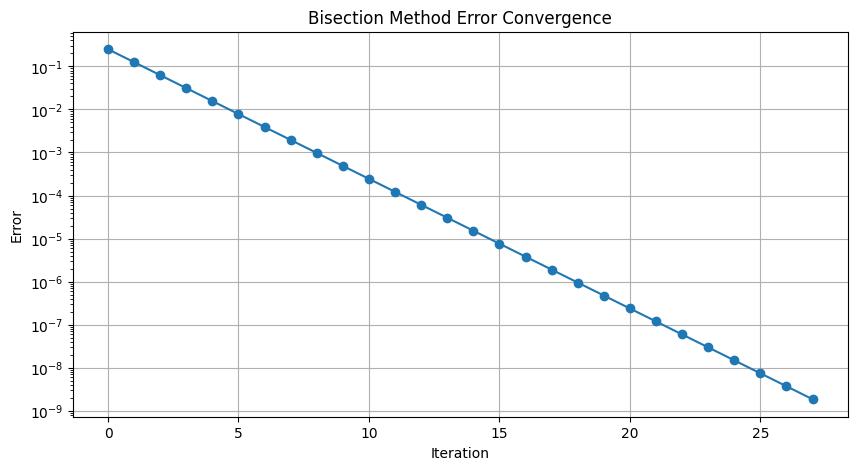

In [2]:
def bisection(f, a, b, tol=10e-10):
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) and f(b) must have different signs")
    
    errors = []
    iterations = 0
    prev_midpoint = None
    while (b - a) / 2.0 > tol:
        midpoint = (a + b) / 2.0
        iterations += 1
        if prev_midpoint is not None:
            error = abs(midpoint - prev_midpoint)
            errors.append(error)
            if error < tol:
                break
        if f(midpoint) == 0:
            return midpoint
        elif f(a) * f(midpoint) < 0:
            b = midpoint
        else:
            a = midpoint
        prev_midpoint = midpoint
        
    if prev_midpoint is not None and abs(midpoint - prev_midpoint):
        final_midpoint = (a + b) / 2.0
        errors.append(abs(final_midpoint - prev_midpoint))
    return (a + b) / 2.0, errors

def bisection_plot():
    a = 0.0 
    b = 1.0
    tol = 10e-10
    root, errors = bisection(f, a, b, tol)
    
    print(f"Root: {root}")
    plt.figure(figsize=(10, 5))
    plt.plot(errors, marker='o')
    plt.title('Bisection Method Error Convergence')
    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.yscale('log')
    plt.grid(True)
    plt.show()
    
bisection_plot()
    


## Newton-Raphson Method

Root: 0.5671432904097811


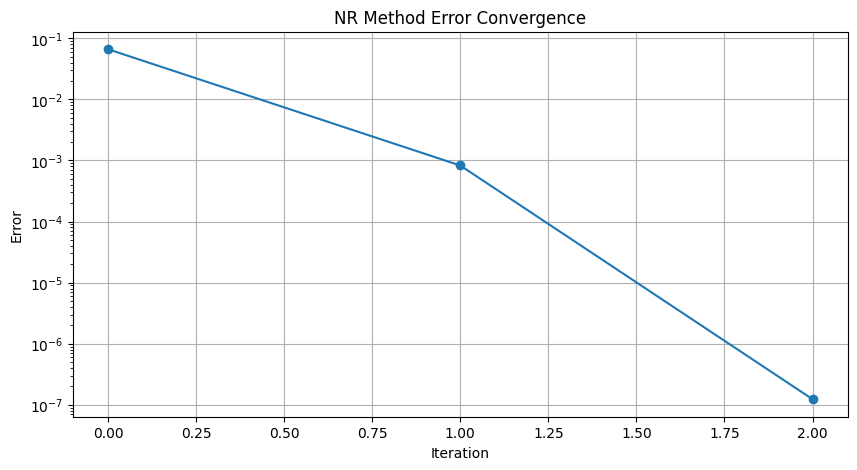

In [3]:
def Newton_Raphson(f, df, x0, tol=10e-10):
    x = x0
    errors = []
    iterations = 0
    prev_x = None
    while abs(f(x)) > tol:
        iterations += 1
        if df(x) == 0:
            raise ValueError("Derivative is zero. No solution found.")
        x_new = x - f(x) / df(x)
        if prev_x is not None:
            if abs(x_new - prev_x):
                errors.append(abs(x_new - prev_x))
        prev_x = x_new
        x = x_new
    # Final error (between last two approximations)
    if prev_x is not None and abs(x - prev_x):
        errors.append(abs(x - prev_x))
    return x, errors


def NR_plot():
    x0 = float(input("Enter initial guess for NR method: "))
    tol = 10e-10
    root, errors = Newton_Raphson(f, df, x0, tol)
    
    print(f"Root: {root}")
    plt.figure(figsize=(10, 5))
    plt.plot(errors, marker='o')
    plt.title('NR Method Error Convergence')
    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.yscale('log')
    plt.grid(True)
    plt.show()
    
NR_plot()



## Secant Method

Root: 0.5671432904097046


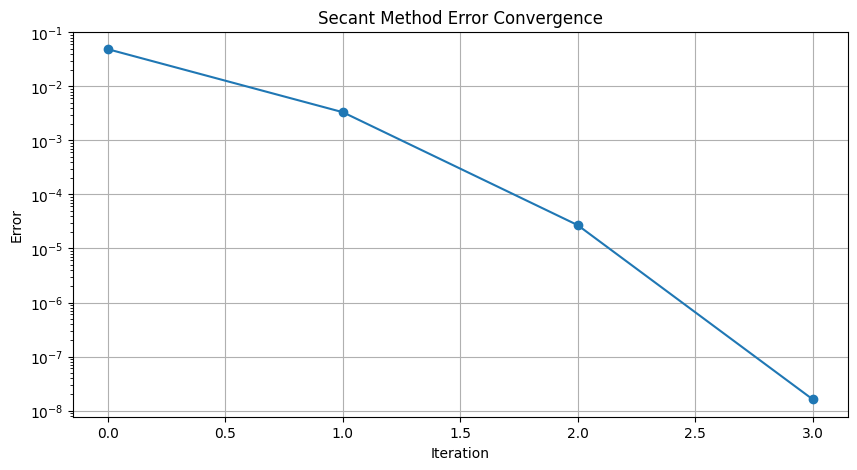

In [6]:
def secant_method(f, x0, x1, tol=10e-10):
    errors = []
    iterations = 0
    prev_x = None
    x_new = 0
    while abs(f(x1)) > tol:
        iterations += 1
        if f(x1) == f(x0):
            raise ValueError("Function values at x0 and x1 are equal. No solution found.")
        x_new = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        if prev_x is not None:
            if abs(x_new - prev_x):
                errors.append(abs(x_new - prev_x))
        prev_x = x_new
        x0, x1 = x1, x_new
    # Final error (between last two approximations)
    if prev_x is not None and abs(x_new - prev_x):
        errors.append(abs(x_new - prev_x))
    return x_new, errors

def secant_plot():
    x0 = float(input("Enter first initial guess for Secant method: "))
    x1 = float(input("Enter second initial guess for Secant method: "))
    tol = 10e-10
    root, errors = secant_method(f, x0, x1, tol)

    print(f"Root: {root}")
    plt.figure(figsize=(10, 5))
    plt.plot(errors, marker='o')
    plt.title('Secant Method Error Convergence')
    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.yscale('log')
    plt.grid(True)
    plt.show()

secant_plot()